# Task #1 

In the following task, we will train a Restricted Boltzmann Machine (RBM) on $H_2$ data. We will  examine the potential energy stored in the molecule as a function of the interatomic distance $r$.

Imports and loading in data:

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import H2_energy_calculator
from RBM_helper import RBM

We will iterate through the data files ```H2_data/R_i_samples.txt``` and store each energy. In order to compute the energy, we will use the ```H2_energy_calculator.py``` file, together with the parameters stored in ```H2_data/H2_coefficients.txt```. 


In [2]:
energies = np.zeros([1,53])
true_energy = np.zeros([1,53])

for i in range(53):
    if i % 2 == 0:
        R_i = round(0.2 + 0.05*i, 2)
    else:
        R_i = round(0.2 + 0.05*i, 1)
        
    training_data = torch.from_numpy(np.loadtxt(f"H2_data/R_{(R_i)}_samples.txt"))
    coeff = np.loadtxt("H2_data/H2_coefficients.txt")[i,:]
    true_energy[0,i] = H2_energy_calculator.energy_from_freq(training_data, coeff)
    print("H2 energy for r =",round(0.2 + 0.05*i, 2),":",true_energy[0,i])
    
    n_vis = 2
    n_hin = 10
    rbm = RBM(n_vis, n_hin)
    epochs = 400 # number of training steps
    num_samples = 2000 # number of samples to generate from the RBM to calculate the H2 energy
  
    for e in range(1, epochs+1):
        # do one epoch of training
        rbm.train(training_data)   
        # now generate samples and calculate the energy
        if e % 200 == 0:
            print("\nEpoch: ", e)
            print("Sampling the RBM...")
            # For sampling the RBM, we need to do Gibbs sampling.
            # Initialize the Gibbs sampling chain with init_state as defined below.
            init_state = torch.zeros(num_samples, n_vis)
            RBM_samples = rbm.draw_samples(15, init_state)
            print("Done sampling. Calculating energy...")       
            energies[0, i] = H2_energy_calculator.energy(RBM_samples, coeff, rbm.wavefunction) 
            print("Energy from RBM samples: ", energies[0, i].item())

H2 energy for r = 0.2 : 0.1442108747311382

Epoch:  200
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  0.15778884696004558

Epoch:  400
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  0.1548289051925998
H2 energy for r = 0.25 : -0.3238575874393826

Epoch:  200
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.30437026105773163

Epoch:  400
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.30799928826183887
H2 energy for r = 0.3 : -0.6129039934108024

Epoch:  200
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.6003578401056684

Epoch:  400
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.5991485033297158
H2 energy for r = 0.35 : -0.8004351205271345

Epoch:  200
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.7802063121844256

Epoch:  4

Energy from RBM samples:  -0.9825770220753038
H2 energy for r = 1.7 : -0.9800155269872984

Epoch:  200
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9637782795032273

Epoch:  400
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9829778381688384
H2 energy for r = 1.75 : -0.9749266732496732

Epoch:  200
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9623229003858074

Epoch:  400
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9640610460428332
H2 energy for r = 1.8 : -0.9708063813726302

Epoch:  200
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9598573729718807

Epoch:  400
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.9667617116723318
H2 energy for r = 1.85 : -0.9665336000954671

Epoch:  200
Sampling the RBM...
Done sampling. Calculating energy...
Energy fro

We can now plot the energy reconstructed with RBM together wit the exact energy:

<IPython.core.display.Javascript object>


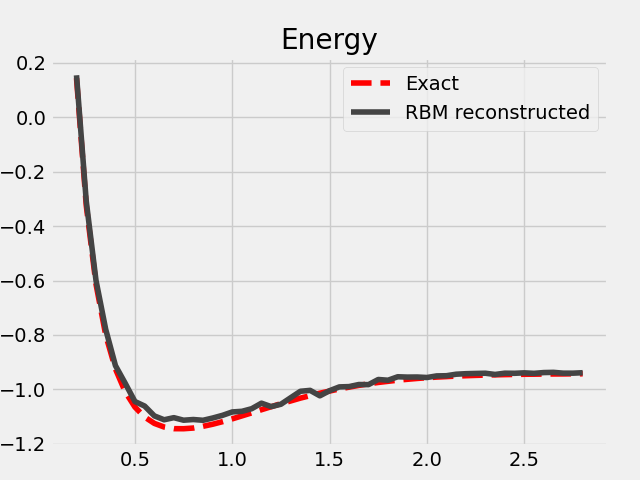

In [24]:
%matplotlib notebook
plt.style.use('fivethirtyeight')

plt.plot(np.arange(0.2,2.85,0.05).reshape(-1,1),true_energy.T, color='r', linestyle='--', label='Exact')
plt.plot(np.arange(0.2,2.85,0.05).reshape(-1,1),energies.T, color='#444444', label='RBM reconstructed')

plt.xlabel('r')
plt.ylabel('E')
plt.title('Energy')
plt.legend()

plt.grid(True)

So, what is going on? When atoms become closer together, their electrons start to feel both nuclei stronger. The electron density shifts from each individual atom to a shared region between both nuclei. The resulting effect is that each hydrogen atom now shair both electrons.
In this new distribution, electrons tend to attract nuclei together, which at the same time repel each other due to Coulomb interaction. In the molecule, the inter atomic distance is the perfect balance between attraction and repulsion forces. That configuration corresponds to the minimum in our graph. What keeps the atoms from separating is the net attraction produced by the shared pair of electrons, configuring what is known as a covalent bond.